In [251]:
# import library pandas
import pandas as pd
import matplotlib.pyplot as plt

In [253]:
# baca file df 
df = pd.read_excel("dataKasus.xlsx")

In [255]:
# lihat jumlah row dan kolom 
df.shape

(561, 13)

In [257]:
# cek data duplikat 
df.duplicated().sum()

0

In [259]:
# cek null 
df.isna().sum()

# drop row jika kolom usia na 
df.dropna(subset=['USIA'], inplace=True)

In [271]:
# cek unique value kolom usia 
df["USIA"].unique()

array([23, 29, 20, 18, 34, 28, 36, 39, 37, 16, 24, 31, 35, 13, 21, 40, 25,
       27, 26, 30, 38, 33, 22, 41, 15, 19, 17, 32, 43, 14], dtype=object)

In [273]:
# mengganti isi kolom usia agar peneulisan sama 
# Looping pada setiap baris DataFrame
for index, row in df.iterrows():
        if isinstance(row['USIA'], str):
            df.at[index, 'USIA'] = int(row['USIA'][:2])
        else:
            df.at[index, 'USIA'] = int(row['USIA'])

# PLOTTING

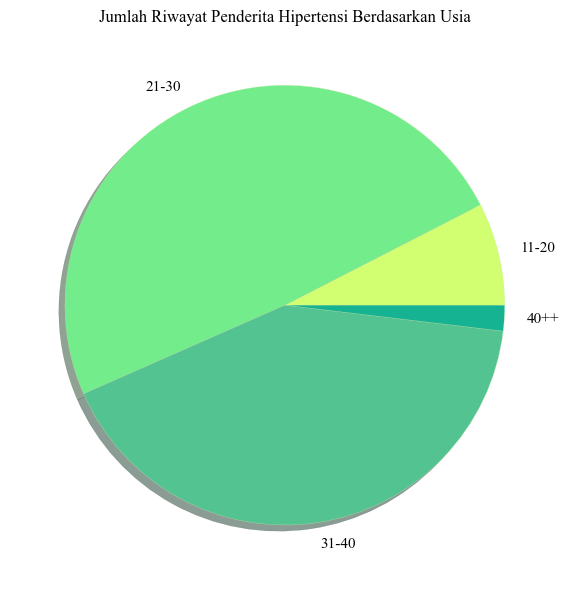

In [367]:
# perbandingan jumlah riwayat hipertensi antara remaja dan dewasa
rhDF = df.loc[df["RIW HIPERTENSI"] == "Ya"]

# buat figure 
fig = plt.figure(figsize = (8,6))

# buat subplot 
ax = fig.add_subplot(1,1,1)

# x dan y data
dataDict = {"11-20" : 0, "21-30" : 0, "31-40" : 0, "40++" : 0}
for i in rhDF["USIA"].values :
    if (i <= 20) :
        dataDict["11-20"] += 1
    elif (i <= 30) :
        dataDict["21-30"] += 1
    elif (i <= 40):
        dataDict["31-40"] += 1
    else :
        dataDict["40++"] += 1 
lData = list(dataDict.keys())
yData = list(dataDict.values())

# buat pie chart
ax.pie(x = yData, labels = lData, shadow = True,
       colors=['#D2FF72','#73EC8B', '#54C392', '#15B392'],
       textprops = {"fontname" : "Times New Roman", "fontsize" : 11}, 
       wedgeprops = {"edgecolor" : "#C0EBA6", "linewidth" : 0.2})

# masukan title 
ax.set_title("Jumlah Riwayat Penderita Hipertensi Berdasarkan Usia", fontname = "Times New Roman", fontsize = 12)

# adjust layout 
fig.tight_layout()

# save figure 
fig.savefig("result.png")